## Data splitting - intuition


In [4]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit, KFold, train_test_split
from sklearn.metrics import mean_squared_error

# some utility functions to create toy data
# data ~ underlying function + gaussian noise

def create_toy_data(func, sample_size, std):
    x = np.linspace(0, 1, sample_size).reshape(-1, 1)
    t = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, t

def a_sinusoidal_func(x):
    return np.sin(2 * np.pi * x)

def a_polynomial_func(x):
    return (12. + 6.14*x - 8.4*x*x)

def an_exp_func(x):
    return (1+1*np.exp(0.001*x))

def a_linear_func(x):
    return (1.17 + 3.14*x)

def a_discontinuous_func(x):
    return [ 1. if el>0.5 else 0. for el in x  ]
    
sample_size = 10
sigma = 0.5

#func = a_sinusoidal_func
#func = a_polynomial_func
#func = a_discontinuous_func
func = a_linear_func

# Lets see what happens when we take many draws of data generated by the same linear function + noise

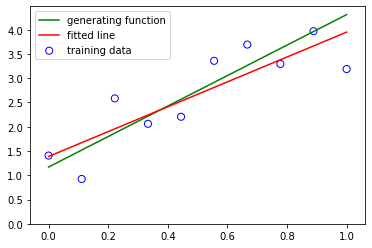

In [5]:
np.random.seed(1234)
x_train, y_train = create_toy_data(func, sample_size, sigma)
x_predict = np.linspace(0, 1, 100).reshape(-1, 1) #  some x-vals so we can generate true y-vals
y_true = func(x_predict)


plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_predict, y_true, c="g", label="generating function")

feature = PolynomialFeatures(degree=1)
X_train = feature.fit_transform(x_train)
X_predict = feature.fit_transform(x_predict)

model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)
y_predict = model.predict(X_predict)

plt.plot(x_predict, y_predict, c="r", label="fitted line")

plt.ylim(bottom=0.0)
plt.legend()
plt.show()

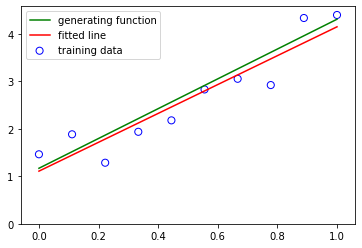

In [6]:
np.random.seed(8675309)
x_train, y_train = create_toy_data(func, sample_size, sigma)
x_predict = np.linspace(0, 1, 100).reshape(-1, 1) #  some x-vals so we can generate true y-vals
y_true = func(x_predict)


plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_predict, y_true, c="g", label="generating function")

feature = PolynomialFeatures(degree=1)
X_train = feature.fit_transform(x_train)
X_predict = feature.fit_transform(x_predict)

model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)
y_predict = model.predict(X_predict)

plt.plot(x_predict, y_predict, c="r", label="fitted line")

plt.ylim(bottom=0.0)
plt.legend()
plt.show()

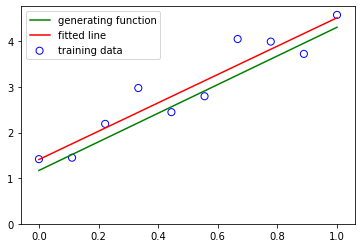

In [7]:
np.random.seed(42)
x_train, y_train = create_toy_data(func, sample_size, sigma)
x_predict = np.linspace(0, 1, 100).reshape(-1, 1) #  some x-vals so we can generate true y-vals
y_true = func(x_predict)


plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_predict, y_true, c="g", label="generating function")

feature = PolynomialFeatures(degree=1)
X_train = feature.fit_transform(x_train)
X_predict = feature.fit_transform(x_predict)

model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)
y_predict = model.predict(X_predict)

plt.plot(x_predict, y_predict, c="r", label="fitted line")

plt.ylim(bottom=0.0)
plt.legend()
plt.show()

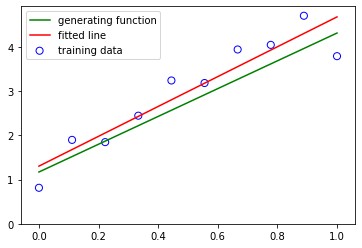

In [8]:
np.random.seed(13)
x_train, y_train = create_toy_data(func, sample_size, sigma)
x_predict = np.linspace(0, 1, 100).reshape(-1, 1) #  some x-vals so we can generate true y-vals
y_true = func(x_predict)


plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_predict, y_true, c="g", label="generating function")

feature = PolynomialFeatures(degree=1)
X_train = feature.fit_transform(x_train)
X_predict = feature.fit_transform(x_predict)

model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)
y_predict = model.predict(X_predict)

plt.plot(x_predict, y_predict, c="r", label="fitted line")

plt.ylim(bottom=0.0)
plt.legend()
plt.show()

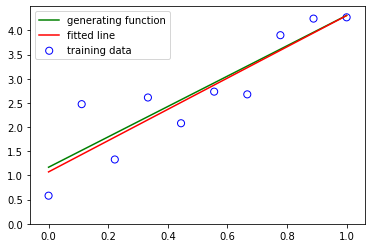

In [9]:
np.random.seed(2001)
x_train, y_train = create_toy_data(func, sample_size, sigma)
x_predict = np.linspace(0, 1, 100).reshape(-1, 1) #  some x-vals so we can generate true y-vals
y_true = func(x_predict)


plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_predict, y_true, c="g", label="generating function")

feature = PolynomialFeatures(degree=1)
X_train = feature.fit_transform(x_train)
X_predict = feature.fit_transform(x_predict)

model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)
y_predict = model.predict(X_predict)

plt.plot(x_predict, y_predict, c="r", label="fitted line")

plt.ylim(bottom=0.0)
plt.legend()
plt.show()

# Hmmm...
So different draws of the same random process produce similar - yet - different results

# Logically we expect the same thing to happen when we draw a larger dataset once, and take different random splits from it

 So let's draw 10 times as many data points a before... and then split them up into 10 non-overlapping folds of data
 

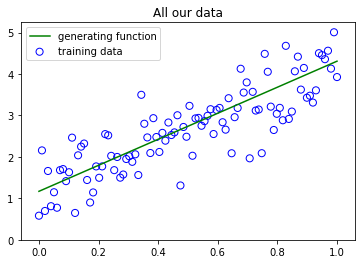

In [10]:
np.random.seed(2001)
sample_size = 100 # 10x number of samples as before

x_all, y_all = create_toy_data(func, sample_size, sigma)
x_predict = np.linspace(0, 1, 100).reshape(-1, 1) #  some x-vals so we can generate true y-vals
y_true = func(x_predict)


plt.scatter(x_all, y_all, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_predict, y_true, c="g", label="generating function")

plt.title('All our data')
plt.ylim(bottom=0.0)
plt.legend()
plt.show()

In [11]:
# get a random shuffling of the #s 0 to 99
shuffled_indices = np.arange(0,100)
np.random.shuffle( shuffled_indices )
print(shuffled_indices)

print('we will split our shuffled data indices into 10 equal groups, 0-9; 10-19; ...')
for start in np.arange(0,99,10):
    stop = start + 9
    print(start,stop,'\t',shuffled_indices[start:stop])
    
# OK lets make some shuffled data
x_all_shuff = x_all[shuffled_indices]
y_all_shuff = y_all[shuffled_indices]

[51 14 48 31 98 27 24 66 16 59 41 17 74 30  0 39 28  9 58 42 81 64 92  2
 11 34 45 37  8 32 44 33 88 77 56 70 20 94  7 15 91 54 46 84 12 26 49 23
 89  4  6 71 52 90 43 19 80 86 21 75 63 10 40 67 55 72 97  1 60 38 29 76
 22 85 65 57  5 73 36 18 78 68 69 83 35 79 82  3 50 87 62 95 93 53 99 47
 25 13 96 61]
we will split our shuffled data indices into 10 equal groups, 0-9; 10-19; ...
0 9 	 [51 14 48 31 98 27 24 66 16]
10 19 	 [41 17 74 30  0 39 28  9 58]
20 29 	 [81 64 92  2 11 34 45 37  8]
30 39 	 [44 33 88 77 56 70 20 94  7]
40 49 	 [91 54 46 84 12 26 49 23 89]
50 59 	 [ 6 71 52 90 43 19 80 86 21]
60 69 	 [63 10 40 67 55 72 97  1 60]
70 79 	 [29 76 22 85 65 57  5 73 36]
80 89 	 [78 68 69 83 35 79 82  3 50]
90 99 	 [62 95 93 53 99 47 25 13 96]


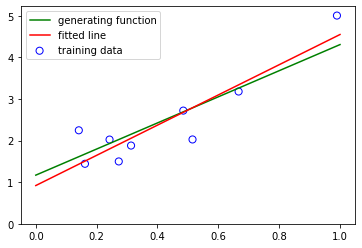

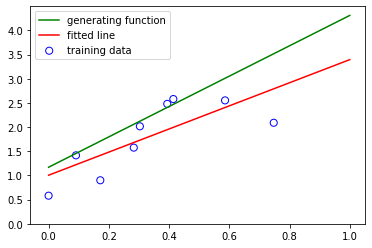

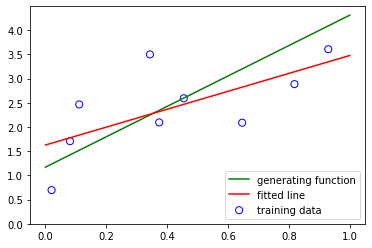

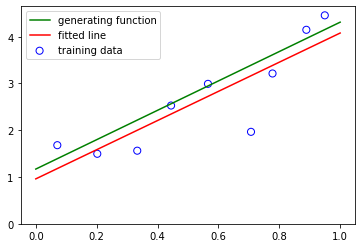

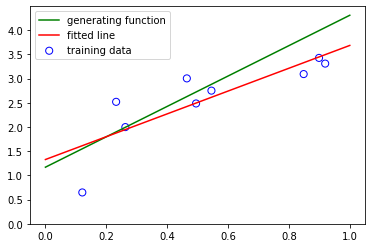

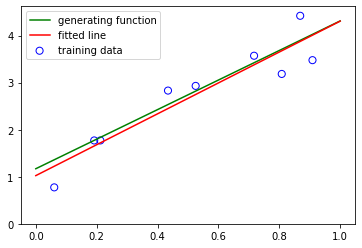

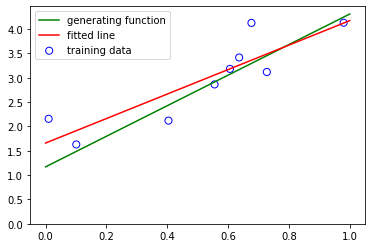

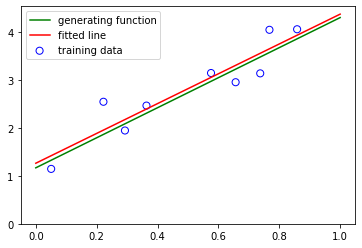

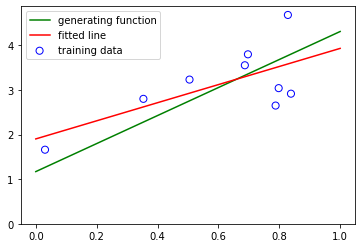

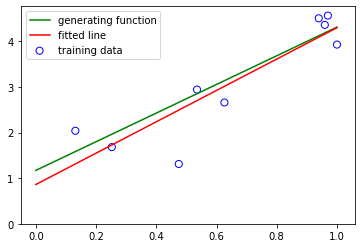

In [12]:
# here we will plot 10 random draws of 10 training points from the bigger 100 point dataset
# and also the resulting lines of regression
for start in np.arange(0,99,10):
    stop = start + 9
    x_train = x_all_shuff[start:stop]
    y_train = y_all_shuff[start:stop]
    
    plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
    plt.plot(x_predict, y_true, c="g", label="generating function")

    feature = PolynomialFeatures(degree=1)
    X_train = feature.fit_transform(x_train)
    X_predict = feature.fit_transform(x_predict)

    model = LinearRegression(fit_intercept=False)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_predict)

    plt.plot(x_predict, y_predict, c="r", label="fitted line")

    plt.ylim(bottom=0.0)
    plt.legend()
    plt.show()
    

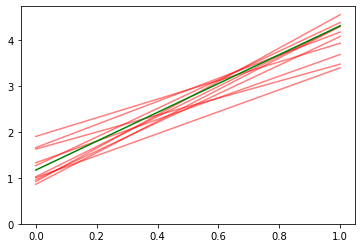

In [13]:
# here we will plot just he resulting lines of regression on top of each other in red
# and the true line generating in green
skip = 10
for start in np.arange(0,99,skip):
    stop = start + (skip-1)
    x_train = x_all_shuff[start:stop]
    y_train = y_all_shuff[start:stop]
    
    #plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
    #plt.plot(x_predict, y_true, c="g", label="generating function")

    feature = PolynomialFeatures(degree=1)
    X_train = feature.fit_transform(x_train)
    X_predict = feature.fit_transform(x_predict)

    model = LinearRegression(fit_intercept=False)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_predict)

    plt.plot(x_predict, y_predict, c="r", label="fitted line", alpha=0.5)

    plt.ylim(bottom=0.0)

plt.plot(x_predict, y_true, c="g", label="generating function")
plt.show()
    

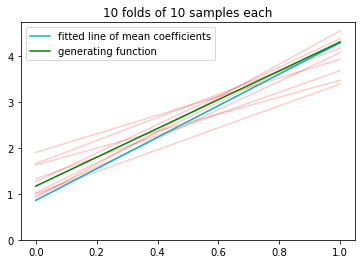

In [14]:
# here we will plot just he resulting lines of regression on top of each other in red
# and the true line generating in green
# and the mean of all the coeficients we came up with in cyan
coefs = []
skip = 10
for start in np.arange(0,99,skip):
    stop = start + (skip-1)
    x_train = x_all_shuff[start:stop]
    y_train = y_all_shuff[start:stop]
    
    #plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
    #plt.plot(x_predict, y_true, c="g", label="generating function")

    feature = PolynomialFeatures(degree=1)
    X_train = feature.fit_transform(x_train)
    X_predict = feature.fit_transform(x_predict)

    model = LinearRegression(fit_intercept=False)
    model.fit(X_train, y_train)
    coefs.append( model.coef_ )
    y_predict = model.predict(X_predict)

    plt.plot(x_predict, y_predict, c="r", alpha=0.2)

    


coefs = np.array(coefs)
mean_coef = np.mean( np.squeeze(coefs), 0)
model.coef_ = mean_coef
y_predict_mean = model.predict(X_predict)

plt.plot(x_predict, y_predict, c="c", label="fitted line of mean coefficients")
plt.plot(x_predict, y_true, c="g", label="generating function")
plt.ylim(bottom=0.0)
plt.title('10 folds of 10 samples each')
plt.legend()
plt.show()
    

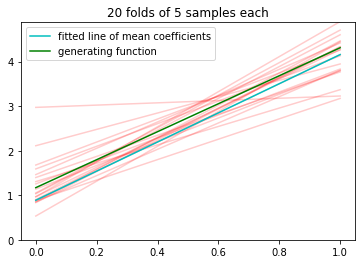

In [20]:
# here we will plot just he resulting lines of regression on top of each other in red
# and the true line generating in green
# and the mean of all the coeficients we came up with in cyan
coefs = []
skip = 5
for start in np.arange(0,99,skip):
    stop = start + skip
    x_train = x_all_shuff[start:stop]
    y_train = y_all_shuff[start:stop]
    
    #plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
    #plt.plot(x_predict, y_true, c="g", label="generating function")

    feature = PolynomialFeatures(degree=1)
    X_train = feature.fit_transform(x_train)
    X_predict = feature.fit_transform(x_predict)

    model = LinearRegression(fit_intercept=False)
    model.fit(X_train, y_train)
    coefs.append( model.coef_ )
    y_predict = model.predict(X_predict)

    plt.plot(x_predict, y_predict, c="r", alpha=0.2)

    


coefs = np.array(coefs)
mean_coef = np.mean( np.squeeze(coefs), 0)
model.coef_ = mean_coef
y_predict_mean = model.predict(X_predict)

plt.plot(x_predict, y_predict, c="c", label="fitted line of mean coefficients")
plt.plot(x_predict, y_true, c="g", label="generating function")
plt.ylim(bottom=0.0, top=4.88)
plt.title('20 folds of 5 samples each')
plt.legend()
plt.show()
    

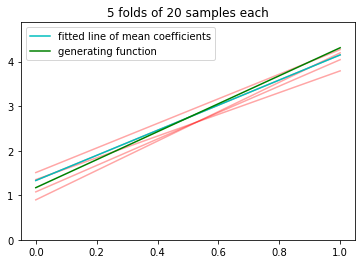

In [21]:
# here we will plot just he resulting lines of regression on top of each other in red
# and the true line generating in green
# and the mean of all the coeficients we came up with in cyan
coefs = []
skip = 20
for start in np.arange(0,99,skip):
    stop = start + (skip-1)
    x_train = x_all_shuff[start:stop]
    y_train = y_all_shuff[start:stop]
    
    #plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
    #plt.plot(x_predict, y_true, c="g", label="generating function")

    feature = PolynomialFeatures(degree=1)
    X_train = feature.fit_transform(x_train)
    X_predict = feature.fit_transform(x_predict)

    model = LinearRegression(fit_intercept=False)
    model.fit(X_train, y_train)
    coefs.append( model.coef_ )
    y_predict = model.predict(X_predict)

    plt.plot(x_predict, y_predict, c="r", alpha=0.35)

    


coefs = np.array(coefs)
mean_coef = np.mean( np.squeeze(coefs), 0)
model.coef_ = mean_coef
y_predict_mean = model.predict(X_predict)

plt.plot(x_predict, y_predict, c="c", label="fitted line of mean coefficients")
plt.plot(x_predict, y_true, c="g", label="generating function")
plt.ylim(bottom=0.0,top=4.88)
plt.title('5 folds of 20 samples each')
plt.legend()
plt.show()
    

In [22]:
coefs

array([[[0.89665214, 3.29922042]],

       [[1.35169483, 2.43951694]],

       [[1.07561333, 2.96658758]],

       [[1.5085391 , 2.75999315]],

       [[1.33087742, 2.81882505]]])




-------





# Let's use a training set and a test set, and take a look at the Mean Squared Error of the residuals

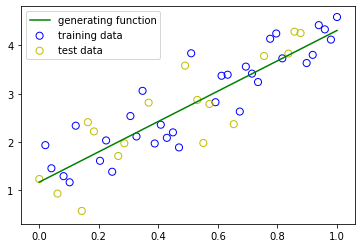

In [15]:
np.random.seed(999)
sample_size = 50 
sigma = 0.5

x_all, y_all = create_toy_data(func, sample_size, sigma)
x_generating = np.linspace(0, 1, 100).reshape(-1, 1) #  some x-vals so we can generate true y-vals
y_generating = func(x_generating)

x_train, x_test, y_train, y_test = train_test_split( x_all, y_all, test_size=0.33)

plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.scatter(x_test, y_test, facecolor="none", edgecolor="y", s=50, label="test data");
plt.plot(x_generating, y_generating, c="g", label="generating function")
plt.legend()
plt.show()



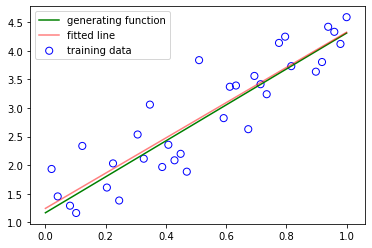

Training set error (MSE): 0.19085028900605377


In [16]:
feature = PolynomialFeatures(degree=1)
X_train = feature.fit_transform(x_train)
X_predict = feature.fit_transform(x_predict)
X_test = feature.fit_transform(x_test)

model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)
y_regr = model.predict(X_predict) # this is the line of regression

# these are the predictions (yhat) once the model is fitted on training and test sets
# the difference between predicted_train and y_train is the training set error 
predicted_train = model.predict(X_train)


plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
#plt.scatter(x_test, y_test, facecolor="none", edgecolor="y", s=50, label="test data");
plt.plot(x_generating, y_generating, c="g", label="generating function")
plt.plot(x_generating, y_regr, c="r", label="fitted line", alpha=0.5)
plt.legend()
plt.show()

print('Training set error (MSE):', mean_squared_error(y_train,predicted_train))


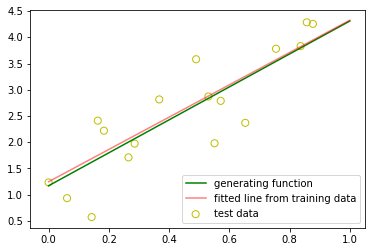

Test set error (MSE): 0.3048649991832024
We are predicting this as a measure of how our function will do when it generalizes to new data points from teh same underlying process
Compare me to the value for a 10k new sample above, which is a better idea of the true generalizaiton


In [17]:

# the difference between predicted_test and y_test is the test set error 
predicted_test = model.predict(X_test) 

#plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.scatter(x_test, y_test, facecolor="none", edgecolor="y", s=50, label="test data");
plt.plot(x_generating, y_generating, c="g", label="generating function")
plt.plot(x_generating, y_regr, c="r", label="fitted line from training data", alpha=0.5)
plt.legend()
plt.show()

print('Test set error (MSE):', mean_squared_error(y_test,predicted_test))
print('We are predicting this as a measure of how our function will do when it generalizes to new data points from teh same underlying process')
print('Compare me to the value for a 10k new sample above, which is a better idea of the true generalizaiton')    



In [18]:
# to verify lets draw a bunch of brand new data and see how it does...

x_new, y_new = create_toy_data(func, 10000, sigma)
X_new = feature.fit_transform(x_new)
predicted_new = model.predict(X_new) 
print('Generalization with new dataset error (MSE)', mean_squared_error(y_new,predicted_new))

Generalization with new dataset error (MSE) 0.2538631588444664


In [19]:
# OK, let's use a 5-fold cross-validation to estimate generalization performance
# we use all the data to make the folds of the cross-validation

X_all = feature.fit_transform(x_all)

k_fold = KFold(n_splits=5)

# collect the predicted y values and true y values of each hold out set
predicteds=[]
trueys=[]
for train, holdout in k_fold.split(X_all, y_all):
    model.fit(X_all[train],y_all[train])
    predicteds.append( model.predict(X_all[holdout]) )
    trueys.append( y_all[holdout] )

# this is because we ended up with a list of arrays, we need a flat array
predicteds = np.array(predicteds).flatten()
trueys = np.array(trueys).flatten()

print('5-fold cross validation error (MSE)', mean_squared_error(trueys,predicteds))
print('Compare me to the value for a 10k new sample above, which is a better idea of the true generalizaiton')    
    

5-fold cross validation error (MSE) 0.2386377807400216
Compare me to the value for a 10k new sample above, which is a better idea of the true generalizaiton
